In [ ]:
%pip install ultralytics
import ultralytics

ultralytics.checks()

Ultralytics 8.3.18 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.8/107.7 GB disk)



0: 480x640 6 apples, 315.4ms
Speed: 19.9ms preprocess, 315.4ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)
apple count: 6


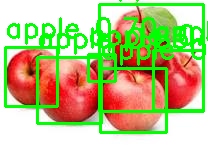

In [ ]:
import cv2
from ultralytics import YOLO
from collections import defaultdict
# Import the necessary patch for Colab
from google.colab.patches import cv2_imshow

# Load the pre-trained YOLOv8 model
model = YOLO("yolov8n.pt")  # or any other YOLOv8 model

# Load the image
image_path = "/content/downloadd.jpeg"  # Specify your image path
im0 = cv2.imread(image_path)
assert im0 is not None, "Error reading the image file"

# Perform object detection on the image
results = model.predict(im0)  # Get predictions for all classes

# Access the bounding boxes and labels from the results
detections = results[0].boxes.data.cpu().numpy()

# Count objects based on labels
object_counts = defaultdict(int)
for detection in detections:
    label = int(detection[5])  # Get the class label
    object_counts[label] += 1  # Increment the count for this label

# Print the counts for each detected object
for label, count in object_counts.items():
    label_name = model.names[label]
    print(f"{label_name} count: {count}")

# Annotate the image (optional)
for detection in detections:
    x1, y1, x2, y2, conf, label = detection
    label = int(label)
    label_name = model.names[label]
    cv2.rectangle(im0, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
    cv2.putText(im0, f"{label_name} {conf:.2f}", (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

# Save or display the annotated image
output_image_path = "object_counting_output.jpg"
cv2.imwrite(output_image_path, im0)
# Use cv2_imshow instead of cv2.imshow in Colab
cv2_imshow(im0)  # Display the annotated image using cv2_imshow
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import cv2
from ultralytics import YOLO
from google.colab.patches import cv2_imshow  # Import cv2_imshow


In [ ]:
pip install ultralytics
